In [73]:
#Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [74]:
#With the seed reset (every time), the same set of numbers will appear every time
np.random.seed(42)

In [75]:
#It is the distance between the two points in Euclidean space
def euclideanDistance(first_X, Second_X):
    return np.sqrt(np.sum((first_X - Second_X)**2))

In [76]:
#Kmean goal is to discover how different points cluster together.
class KMean():
    def __init__(self, K=3,maxIter=100, plotSteps=False):
        self.K = K 
        self.maxIter = maxIter
        self.plotSteps = plotSteps
        #sample indices for each cluster, listed.
        self.clusters = [[] for _ in range(self.K)]
        #the centers of each cluster (mean feature vector)
        self.centroids = []
    def prediction(self, X):
        self.X = X 
        self.n_samples, self.n_features = X.shape 
        #initialize 
        randoSampleIdxs = np.random.choice(self.n_samples, self.K)
        self.centroids = [self.X[idx] for idx in randoSampleIdxs]
        #Enhance clusters
        for _ in range(self.maxIter):
            #Organize samples by nearest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)
            #Create fresh centroids using the clusters
            centroidsOld = self.centroids
            self.centroids = self._get_centroids(self.clusters)
          
            # verify whether clusters have changed.
            if self._is_converged(centroidsOld, self.centroids):
                break
        #Sort samples according to the index of their clusters
        return self._get_cluster_labels(self.clusters)
    def _get_cluster_labels(self, clusters):
        #Each sample will be given the cluster label to which it was assigned
        labels = np.empty(self.n_samples)
        for clusterIdx, cluster in enumerate(clusters):
            for sampleIndex in cluster:
                labels[sampleIndex] = clusterIdx
        return labels
    def _create_clusters(self, centroids):
        #Cluster the samples by distributing them among the nearby centroids
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroidIdx = self._closest_centroid(sample, centroids)
            clusters[centroidIdx].append(idx)
        return clusters
    def _closest_centroid(self, sample, centroids):
        #the current sample's separation from each centroid
        dist = [euclideanDistance(sample, point) for point in centroids]
        closesIndex = np.argmin(dist)
        return closesIndex
    def _get_centroids(self, clusters):
        #give centroids the cluster mean value
        centroids = np.zeros((self.K, self.n_features))
        for clusterIdx, cluster in enumerate(clusters):
            clusterMean = np.mean(self.X[cluster], axis=0)
            centroids[clusterIdx] = clusterMean
        return centroids
    def _is_converged(self, centroidsOld, centroids):
        #distances for all centroids between each old and new centroid
        dist = [euclideanDistance(centroidsOld[i], centroids[i]) for i in range(self.K)]
        return sum(dist) == 0
        
    def cent(self):
        return self.centroids
    


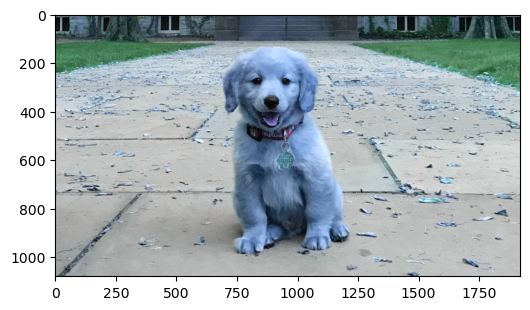

In [77]:
pic = cv2.imread("image.jpg")
plt.figure(figsize=(6, 6))
plt.imshow(pic)

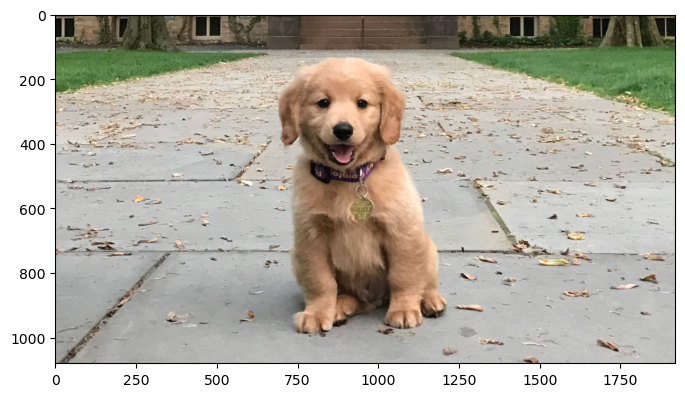

In [82]:
pic = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,18)) 
plt.imshow(pic)

In [83]:
pixelValues = pic.reshape((-1, 3))
pixelValues = np.float32(pixelValues)
print(pixelValues.shape)

(2073600, 3)


In [84]:
k = KMean(K=3, maxIter=10)  
y_output = k.prediction(pixelValues) 
k.cent()

array([[ 72.63418579,  67.88366699,  47.36310959],
       [138.68482971, 129.06898499, 101.36251831],
       [197.32511902, 192.34771729, 184.89978027]])

In [85]:
centers = np.uint8(k.cent())
centers

array([[ 72,  67,  47],
       [138, 129, 101],
       [197, 192, 184]], dtype=uint8)

In [86]:
y_output

array([0., 0., 0., ..., 2., 2., 2.])

In [87]:
y_output = y_output.astype(int)
np.unique(y_output)

array([0, 1, 2])

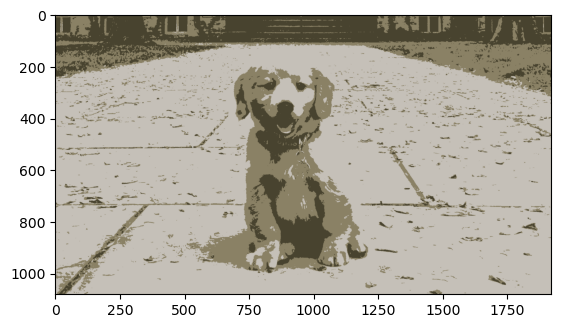

In [88]:
labels = y_output.flatten()
segmentedImage = centers[labels.flatten()]
segmentedImage = segmentedImage.reshape(pic.shape)
plt.imshow(segmentedImage)
plt.show()